In [1]:
# Tarea: Recrear esta misma metodología para un problema aún no visto

In [2]:
try:
  %tensorflow_version 2.x # colab only
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.11.0


## Data pre processing

In [3]:
# load int the data
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
type(data)

sklearn.utils._bunch.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data.data.shape # (m, d) m: número de muestras y d: número de features/características

(569, 30)

In [8]:
data.target # Problema de clasificación binaria

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data.target.shape # m debe ser igual que en data

(569,)

In [11]:
data.data 

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [12]:
# Es importante saber qué significan las features, por lo que debemos ver qué 
  # significa cada elemento

data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                    data.data, data.target, 
                                                    test_size=0.33, random_state=31
                                                  )

In [14]:
M, D = X_train.shape

In [15]:
print(M, D)

381 30


In [16]:
# Debemos escalar la data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Ajustados (fit) solo en el entrenamiento,
                                          # dado que los parámetros del modelo deben ser ajustado a partir de este set de datos.
X_test = scaler.transform(X_test)

## Model building

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid') # 1 porque solo queremos 1 output,
])

In [18]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', # este loss va con el sigmoid y con la clasificación binaria
    metrics=['accuracy']
) # 

## Model training

In [19]:
r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=100
              )

Epoch 1/100
12/12 [==============================] - 5s 20ms/step - loss: 0.6703 - accuracy: 0.6929 - val_loss: 0.6848 - val_accuracy: 0.6436
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6211 - accuracy: 0.7113 - val_loss: 0.6378 - val_accuracy: 0.6809
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.5765 - accuracy: 0.7428 - val_loss: 0.5960 - val_accuracy: 0.7287
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5370 - accuracy: 0.7664 - val_loss: 0.5586 - val_accuracy: 0.7500
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5018 - accuracy: 0.7953 - val_loss: 0.5254 - val_accuracy: 0.7819
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4703 - accuracy: 0.8084 - val_loss: 0.4957 - val_accuracy: 0.8032
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4415 - accuracy: 0.8294 - val_loss: 0.4695 - val_accuracy: 0.8245
Epoch 8/100


## Model results

In [20]:
print("Training score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 3ms/step - loss: 0.0906 - accuracy: 0.9790
Training score: [0.09058354794979095, 0.9790025949478149]
6/6 [==============================] - 0s 4ms/step - loss: 0.1055 - accuracy: 0.9787
Test score: [0.10545062273740768, 0.978723406791687]


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

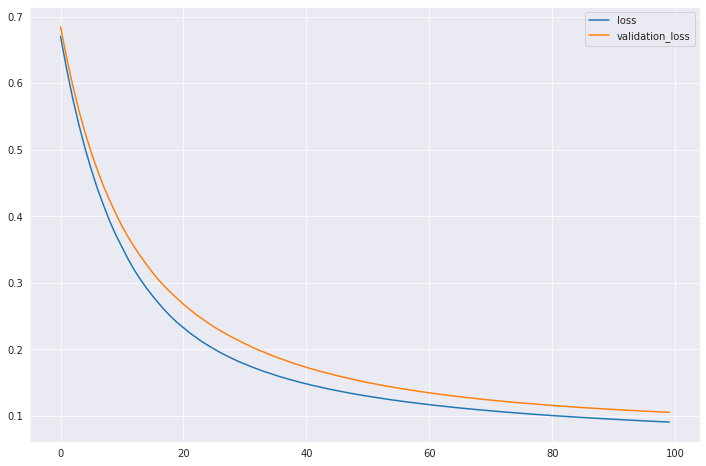

In [27]:

# Ajusta el tamaño del gráfico (ancho, alto)
plt.figure(figsize=(12, 8))

# Grafica las curvas de pérdida y validación
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='validation_loss')

# Muestra la leyenda
plt.legend()

# Muestra el gráfico
plt.show()


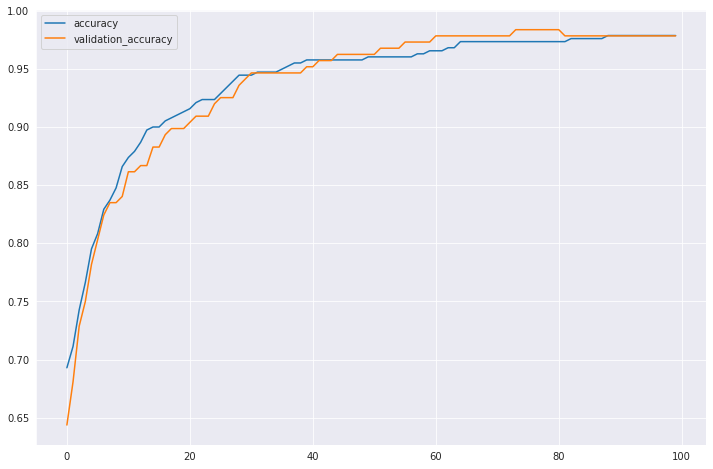

In [31]:
# Ajusta el tamaño del gráfico (ancho, alto)
plt.figure(figsize=(12, 8))

plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='validation_accuracy')

plt.legend();

plt.show()